# Autoencoder

This model used two Con2D layers, 2 maxpooling layers, 1 flatten layer and 2 dense layers. The activation function is Relu.

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import GlobalMaxPooling1D, SimpleRNN, MaxPooling1D, Conv1D, Dropout, Concatenate, Reshape, Conv2D, Dense, Flatten, Activation, MaxPooling2D, Input, UpSampling2D, Embedding, SpatialDropout1D
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from scipy import misc
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers.recurrent import LSTM

In [0]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [0]:
#prepare the training and test data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [14]:
#construct encoder and decoder, and link encoder, encoder with model to build a complete autoencoder model
input_img = Input(shape=(28,28,1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
# "encoded" is the encoded representation of the input
encoded = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2),)(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
# "decoded" is the lossy reconstruction of the input
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)



# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0   

In [15]:
autoencoder.fit(x_train, x_train, batch_size=100, epochs=5, shuffle=True,validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.1990 - val_loss: 0.1440
Epoch 2/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.1346 - val_loss: 0.1251
Epoch 3/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.1215 - val_loss: 0.1167
Epoch 4/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.1149 - val_loss: 0.1115
Epoch 5/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.1107 - val_loss: 0.1079


In [0]:
decode_imgs = autoencoder.predict(x_test)

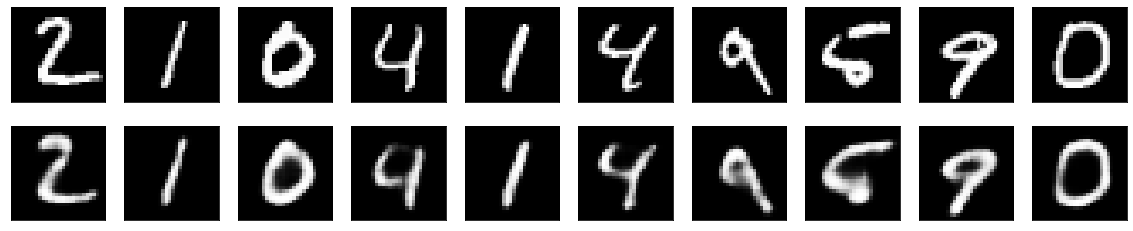

In [17]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decode_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Image Classification

## CNN

In this model, there are 11 layers in total, which is 2 Convolutional2D layer, 2 Maxpooling layer, 1 flatten layer and 2 dense layer.  
the first convolution2D layer has 25 kernels with size (5,5), the size of stride is 1.   
the next layer is the first maxpooling layer, it has kernel size of (2,2).  
the next layer is the second convolutional layer which has 50 kernels of size (5,5).  


In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_test = np_utils.to_categorical(y_test, 10)
y_train = np_utils.to_categorical(y_train, 10)

# design model
model = Sequential()
model.add(Conv2D(25, (5, 5), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Activation('relu'))
model.add(Conv2D(50, (5, 5)))
model.add(MaxPooling2D(2, 2))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
adam = Adam(lr=0.001)
# compile model
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
# training model
model_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=100, epochs=5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 25)        650       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 25)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 25)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 50)          31300     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)              

<Figure size 432x288 with 0 Axes>

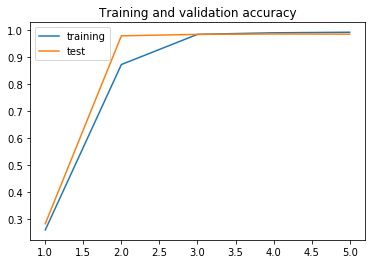

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(np.array(range(1,6)),np.array(model_training.history['acc']),label='training')
plt.plot(range(1,6),model_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'upper left')
plt.figure()

<Figure size 432x288 with 0 Axes>

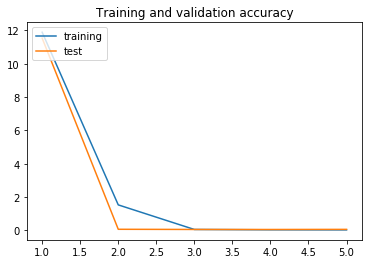

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(range(1,6),model_training.history["loss"],label='training')
plt.plot(range(1,6),model_training.history['val_loss'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'upper left')
plt.figure()

In [23]:
# test model
print('the performance on test set is:')
print(model.evaluate(x_test, y_test, batch_size=100))
print('the performance on training set is:')
print(model.evaluate(x_train, y_train, batch_size=100))

the performance on test set is:
10000/10000 [==============================] - 0s 35us/step
[0.06096772678312846, 0.9841000074148178]
the performance on training set is:
60000/60000 [==============================] - 2s 35us/step
[0.022160312537186352, 0.9923333402474721]


## Transfer Learning 

In [0]:
# preparing the train dataset
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = np.stack([X_train] * 3, axis = -1 )
X_test = np.stack([X_test] * 3, axis = -1 )
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# Resize the images 48*48 as required by VGG16
from keras.preprocessing.image import img_to_array, array_to_img
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in X_test])

In [0]:
# Normalise the data and change data type
X_train = X_train / 255.
X_test = X_test / 255.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [52]:
X_train.shape,X_test.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

import the pre_trained model and discard the last layer, becasue the inbuilt last layer has 1000 neurons to get 1000 classification, in our dataset, we just need 10 classes, so we discard it in advance and add another dense layer which makes 10 classes. 

In [0]:
# Create base model of VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape = (32, 32, 3))

In [0]:
model1 = Sequential()
model1.add(vgg16)
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(96, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation="softmax"))

In [0]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
model1_training = model1.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test), batch_size=64, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 98s 2ms/step - loss: 1.2030 - acc: 0.5189 - val_loss: 0.5261 - val_acc: 0.8075
Epoch 2/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.5219 - acc: 0.8271 - val_loss: 0.4216 - val_acc: 0.8582
Epoch 3/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.3979 - acc: 0.8694 - val_loss: 0.3526 - val_acc: 0.8775
Epoch 4/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.3333 - acc: 0.8906 - val_loss: 0.3356 - val_acc: 0.8877
Epoch 5/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2964 - acc: 0.9028 - val_loss: 0.3068 - val_acc: 0.9028
Epoch 6/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2831 - acc: 0.9090 - val_loss: 0.3006 - val_acc: 0.8988
Epoch 7/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2549 - acc: 0.9167 - val_loss: 0.2866 - val_acc

<Figure size 432x288 with 0 Axes>

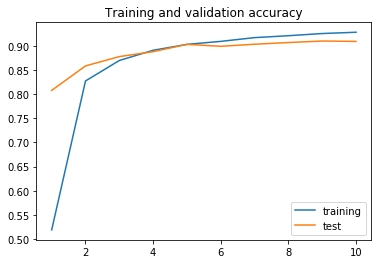

<Figure size 432x288 with 0 Axes>

In [61]:
plt.plot(range(1,11),model1_training.history["acc"],label='training')
plt.plot(range(1,11),model1_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()


<Figure size 432x288 with 0 Axes>

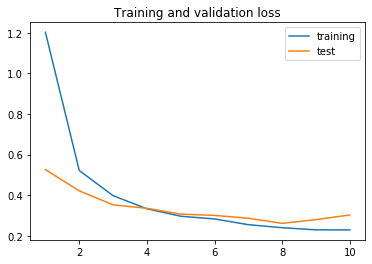

<Figure size 432x288 with 0 Axes>

In [62]:
plt.plot(range(1,11),model1_training.history["loss"],label='training')
plt.plot(range(1,11),model1_training.history['val_loss'],label='test')
plt.title('Training and validation loss')
plt.legend(loc = 'upper right')
plt.figure()

In [63]:
# test model
print('the performance on test set is:')
print(model1.evaluate(X_test, Y_test, batch_size=100))
print('the performance on training set is:')
print(model1.evaluate(X_train, Y_train, batch_size=100))

the performance on test set is:
10000/10000 [==============================] - 3s 340us/step
[0.3026821402460337, 0.9089000010490418]
the performance on training set is:
60000/60000 [==============================] - 20s 327us/step
[0.20156986371303598, 0.932050001223882]


# Text Classification

## RNN

In [66]:
from google.colab import files
uploaded = files.upload()


Saving tweets_with_labels.csv to tweets_with_labels (1).csv


In [0]:
import pandas as pd
import io
tweet = io.BytesIO(uploaded['tweets_with_labels.csv']) 
df = pd.read_csv(tweet,delimiter='\t')

In [68]:
df.head()

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [0]:
from gensim.corpora import Dictionary
#tokenizer the text
tweet = list(df['tweet'].map(lambda x:list(x)))
dct = Dictionary(tweet)
X = list(df['tweet'].map(lambda x: dct.doc2idx(list(x))))
y = df.loc[:,'k1':'k15']


In [0]:
#pad the tokenized text
maxlen = 50
max_features = 15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train = pad_sequences(X_train, maxlen, padding="post", truncating="post")
X_test = pad_sequences(X_test, maxlen, padding="post", truncating="post")

In [0]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(32))
model.add(Dense(15, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [110]:
history = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test))

Train on 54562 samples, validate on 23384 samples
Epoch 1/50
54562/54562 [==============================] - 18s 325us/step - loss: 2.6648 - acc: 0.2845 - val_loss: 2.5977 - val_acc: 0.2991
Epoch 2/50
54562/54562 [==============================] - 16s 294us/step - loss: 2.5927 - acc: 0.2975 - val_loss: 2.6161 - val_acc: 0.2462
Epoch 3/50
54562/54562 [==============================] - 16s 294us/step - loss: 2.5842 - acc: 0.3022 - val_loss: 2.5875 - val_acc: 0.2992
Epoch 4/50
54562/54562 [==============================] - 16s 290us/step - loss: 2.5888 - acc: 0.2980 - val_loss: 2.5376 - val_acc: 0.3048
Epoch 5/50
54562/54562 [==============================] - 16s 291us/step - loss: 2.5865 - acc: 0.2961 - val_loss: 2.5802 - val_acc: 0.2976
Epoch 6/50
54562/54562 [==============================] - 16s 293us/step - loss: 2.5953 - acc: 0.2947 - val_loss: 2.5851 - val_acc: 0.3032
Epoch 7/50
54562/54562 [==============================] - 16s 294us/step - loss: 2.5907 - acc: 0.2971 - val_loss: 2.

<Figure size 432x288 with 0 Axes>

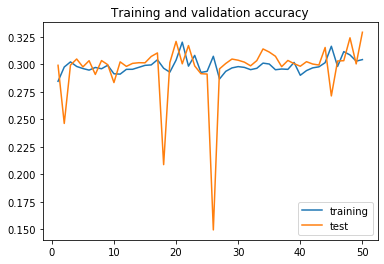

<Figure size 432x288 with 0 Axes>

In [112]:
plt.plot(range(1,51),history.history["acc"],label='training')
plt.plot(range(1,51),history.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

<Figure size 432x288 with 0 Axes>

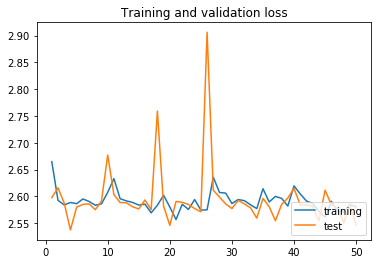

<Figure size 432x288 with 0 Axes>

In [114]:
plt.plot(range(1,51),history.history["loss"],label='training')
plt.plot(range(1,51),history.history['val_loss'],label='test')
plt.title('Training and validation loss')
plt.legend(loc = 'lower right')
plt.figure()

In [115]:
print('the performance on test set is:')
print(model.evaluate(X_test, y_test, batch_size=100))
print('the performance on training set is:')
print(model.evaluate(X_train, y_train, batch_size=100))


the performance on test set is:
23384/23384 [==============================] - 1s 62us/step
[2.546897551069674, 0.32911392494276537]
the performance on training set is:
54562/54562 [==============================] - 3s 61us/step
[2.5476443539188036, 0.3285620041110466]


## CNN

In [102]:
max_features = 15
cnn = Sequential()
cnn.add(Embedding(max_features, 64))
cnn.add(Dropout(0.25))
cnn.add(Conv1D(64, 5, activation='relu'))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dense(15, activation='softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

cnn_training = cnn.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test))

Train on 54562 samples, validate on 23384 samples
Epoch 1/50
54562/54562 [==============================] - 8s 138us/step - loss: 2.2596 - acc: 0.4955 - val_loss: 1.7877 - val_acc: 0.6605
Epoch 2/50
54562/54562 [==============================] - 6s 102us/step - loss: 1.6602 - acc: 0.6941 - val_loss: 1.5524 - val_acc: 0.7290
Epoch 3/50
54562/54562 [==============================] - 5s 100us/step - loss: 1.5248 - acc: 0.7323 - val_loss: 1.4714 - val_acc: 0.7461
Epoch 4/50
54562/54562 [==============================] - 6s 101us/step - loss: 1.4652 - acc: 0.7452 - val_loss: 1.4365 - val_acc: 0.7533
Epoch 5/50
54562/54562 [==============================] - 6s 101us/step - loss: 1.4341 - acc: 0.7522 - val_loss: 1.4206 - val_acc: 0.7565
Epoch 6/50
54562/54562 [==============================] - 5s 100us/step - loss: 1.4126 - acc: 0.7561 - val_loss: 1.3981 - val_acc: 0.7609
Epoch 7/50
54562/54562 [==============================] - 6s 101us/step - loss: 1.3991 - acc: 0.7589 - val_loss: 1.3855 - 

<Figure size 432x288 with 0 Axes>

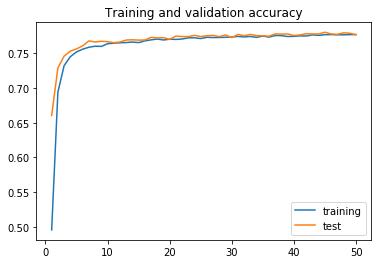

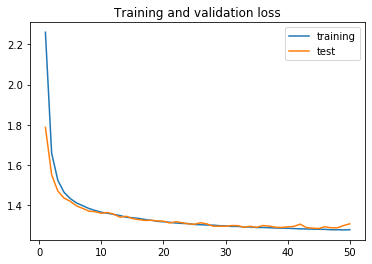

<Figure size 432x288 with 0 Axes>

In [104]:
plt.plot(range(1,51),cnn_training.history["acc"],label='training')
plt.plot(range(1,51),cnn_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(range(1,51),cnn_training.history["loss"],label='training')
plt.plot(range(1,51),cnn_training.history['val_loss'],label='test')
plt.title('Training and validation loss')
plt.legend(loc = 'upper right')
plt.figure()

Compare RNN and CNN

<Figure size 432x288 with 0 Axes>

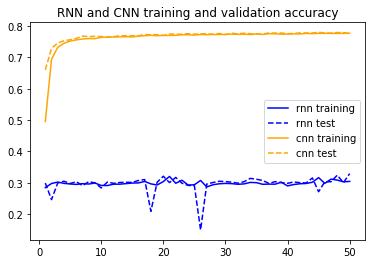

<Figure size 432x288 with 0 Axes>

In [117]:
plt.plot(range(1,51),history.history["acc"],label='rnn training',color='b')
plt.plot(range(1,51),history.history['val_acc'],label='rnn test',linestyle='dashed',color='b')
plt.plot(range(1,51),cnn_training.history["acc"],label='cnn training',color='orange')
plt.plot(range(1,51),cnn_training.history['val_acc'],label='cnn test',linestyle='dashed',color='orange')
plt.legend(loc = 'best')
plt.title('RNN and CNN training and validation accuracy')
plt.figure()

<Figure size 432x288 with 0 Axes>

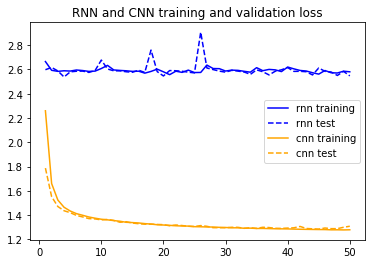

<Figure size 432x288 with 0 Axes>

In [120]:
plt.plot(range(1,51),history.history["loss"],label='rnn training',color='b')
plt.plot(range(1,51),history.history['val_loss'],label='rnn test',linestyle='dashed',color='b')
plt.plot(range(1,51),cnn_training.history["loss"],label='cnn training',color='orange')
plt.plot(range(1,51),cnn_training.history['val_loss'],label='cnn test',linestyle='dashed',color='orange')
plt.legend(loc = 'best')
plt.title('RNN and CNN training and validation loss')
plt.figure()